In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = np.array([[4,10],[7,10],[4,8],[6,8],[12,6],
        [10,5],[11,4],[3,4],[9,3],[12,3],[2,2],[5,2]])

In [3]:
data.shape

(12, 2)

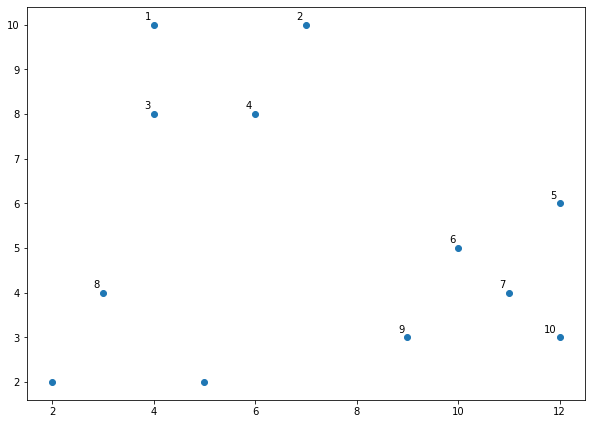

In [4]:
labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(data[:,0],data[:,1], label='True Position')

for label, x, y in zip(labels, data[:, 0], data[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')

In [5]:
from sklearn.cluster import AgglomerativeClustering

In [6]:
#cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster1 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')
cluster1.fit_predict(data)

array([2, 2, 2, 2, 1, 1, 1, 0, 1, 1, 0, 0], dtype=int64)

In [7]:
#cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster2 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster2.fit_predict(data)

array([0, 0, 0, 0, 1, 1, 1, 2, 1, 1, 2, 2], dtype=int64)

In [8]:
#cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
cluster3.fit_predict(data)

array([2, 2, 2, 2, 0, 0, 0, 1, 0, 0, 1, 1], dtype=int64)

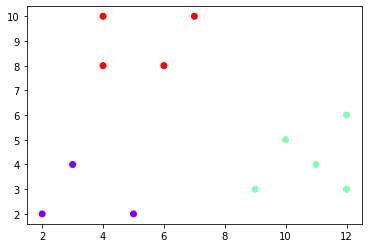

In [9]:
plt.scatter(data[:,0],data[:,1], c=cluster1.labels_, cmap='rainbow')

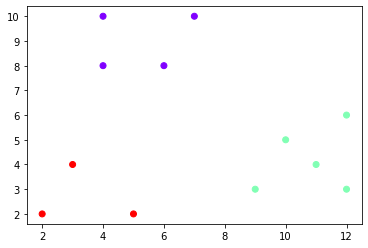

In [10]:
plt.scatter(data[:,0],data[:,1], c=cluster2.labels_, cmap='rainbow')

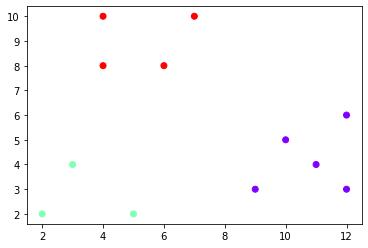

In [11]:
plt.scatter(data[:,0],data[:,1], c=cluster3.labels_, cmap='rainbow')

In [12]:
import scipy.cluster.hierarchy as shc

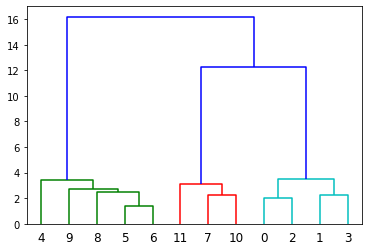

In [13]:
dend = shc.dendrogram(shc.linkage(data, method='ward'))

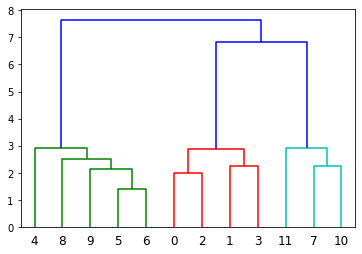

In [14]:
dend = shc.dendrogram(shc.linkage(data, method='average'))

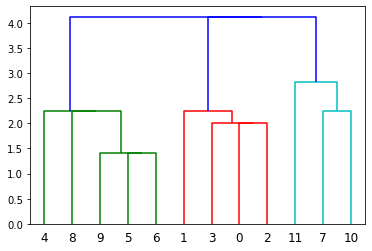

In [15]:
dend = shc.dendrogram(shc.linkage(data, method='single'))

In [16]:
### Excercise 7.3.4

In [17]:
from sklearn.cluster import KMeans

In [18]:
cluster = KMeans(3)

In [19]:
cluster.fit(data)

KMeans(n_clusters=3)

In [20]:
cluster.cluster_centers_

array([[ 3.33333333,  2.66666667],
       [10.8       ,  4.2       ],
       [ 5.25      ,  9.        ]])

In [31]:
# n 
unique, counts = np.unique(cluster.labels_, return_counts=True)
cluster_counts = dict(zip(unique, counts))
cluster_counts

{0: 3, 1: 5, 2: 4}

In [22]:
# cluster sums
cluster_sums = {}

for arr, lab in zip(data,cluster.labels_):
    if lab in cluster_sums:
        cluster_sums[lab] = np.add(cluster_sums[lab],arr)
    else:
        cluster_sums[lab] = arr
        
cluster_sums

{2: array([21, 36]), 1: array([54, 21]), 0: array([10,  8])}

In [23]:
cluster_sqsums = {}
for arr, lab in zip(data, cluster.labels_):
    if lab in cluster_sqsums:
        cluster_sqsums[lab] = np.add(cluster_sqsums[lab], np.power(arr,2))
    else:
        cluster_sqsums[lab] = np.power(arr,2)

print(f'Sum of squares for each cluster: {cluster_sqsums}')

Sum of squares for each cluster: {2: array([117, 328], dtype=int32), 1: array([590,  95], dtype=int32), 0: array([38, 24], dtype=int32)}


In [33]:
# Cluster variance
cluster_vars = {}
for label in cluster_sums:
    #print(f'{np.var(cluster_sums[label])}')
    cluster_vars[label] = cluster_sqsums[label]/cluster_counts[label] - np.power(cluster_sums[label]/cluster_counts[label],2)
    
cluster_vars

{2: array([1.6875, 1.    ]),
 1: array([1.36, 1.36]),
 0: array([1.55555556, 0.88888889])}

In [40]:
# Cluster stdev
cluster_stds = {}
for label in cluster_vars:
    cluster_stds[label] = np.sqrt(cluster_vars[label])

cluster_stds

{2: array([1.29903811, 1.        ]),
 1: array([1.16619038, 1.16619038]),
 0: array([1.24721913, 0.94280904])}

In [41]:
### Exercise 7.3.5

In [42]:
p = np.array([[1,-3,4]])

In [43]:
p

array([[ 1, -3,  4]])

In [44]:
p.shape

(1, 3)

In [45]:
c = np.array([[0,0,0]])

In [46]:
c

array([[0, 0, 0]])

In [47]:
c.shape

(1, 3)

In [48]:
sigs = np.array([[2,3,5]]) 

In [49]:
md = np.sqrt((((c - p)/sigs)**2).sum())

In [50]:
print(f'Mahalanobis distance is: {md}')

Mahalanobis distance is: 1.374772708486752
